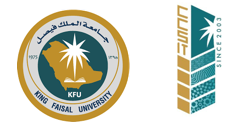

<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>
CS323: Digital Image Processing – Practical Class 
</h1>


<strong>
<center>[0921 - 323]: [Digital Image Processing]
<br><br>
<center>Section: [Male/Female]
<br><br><br><br>

<center>Lab [03]: [Point Processing and Histogram Manipulation]
<br><br><br><br>

<center> Date: []
<center> Time: []
<br><br>


<center> Instructor: []
</strong>

# Introduction

In this lab, we will discuss some of the most basic tools in image processing, such as Point-wise intensity transformations (pixel transformation) and Histogram processing (histogram equalization) which are still among the most powerful tools in image enhancement to improve the quality of an image or make particular features appear more prominent. 


**Objectives: **
* Learn the basic Point-wise intensity transformation such as: Image negatives, Color space transformation, Log transform, Power-law transformation, Contrast stretching, etc.
* Learn histogram equalization to alter the dynamic range of pixel values in an image and thereby enhances the contrast of the image.

**Tools/Software Requirement:**
*	Anaconda Navigator


**Lab Activity Description:**

Part 1: Fundamentals of Image processing.
* Point-wise intensity transformation
* Histogram equalization

Part 2: Lab Task.
*	Student solves programming questions using Python.


# Part 1: Fundamentals of Image Processing 

## 1.1 Point-wise intensity transformations – pixel transformation


Point-wise intensity transformation operation applies a transfer function, T, to each pixel, f(x,y), of the input image to generate a corresponding pixel in the output image.


### 1.1.1 Access and edit image pixel value using OpenCV 

Import OpenCV and MatPlot

In [1]:
!!pip install opencv-python


['Requirement already satisfied: opencv-python in c:\\users\\turki\\appdata\\local\\programs\\python\\python39\\lib\\site-packages (4.7.0.72)',
 'Requirement already satisfied: numpy>=1.17.3 in c:\\users\\turki\\appdata\\local\\programs\\python\\python39\\lib\\site-packages (from opencv-python) (1.24.3)',
 'WARNING: You are using pip version 22.0.4; however, version 23.1.2 is available.',
 "You should consider upgrading via the 'C:\\Users\\Turki\\AppData\\Local\\Programs\\Python\\Python39\\python.exe -m pip install --upgrade pip' command."]

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Load Image and Display image and properties

Image Propreties (667, 1000, 3)


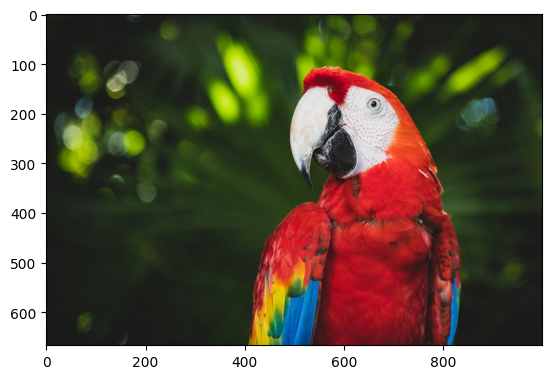

In [3]:
img = cv2.imread('parrot.jpeg') #read image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert image to RGB
print('Image Propreties', img.shape) #print image properties (row, col, channel)
plt.imshow(img) #show image

Access Particular Pixel Value

In [4]:
px = img[200, 600] #define image pixel location (row, col)
print(px) #print pixel value RGB

[227 223 222]


Changing Pixel value

In [5]:
px = img[200, 600] #define image pixel location (row, col)
img[200,600, 0] = 0 #changes pixel value
print(px) #print pixel value RGB

[  0 223 222]


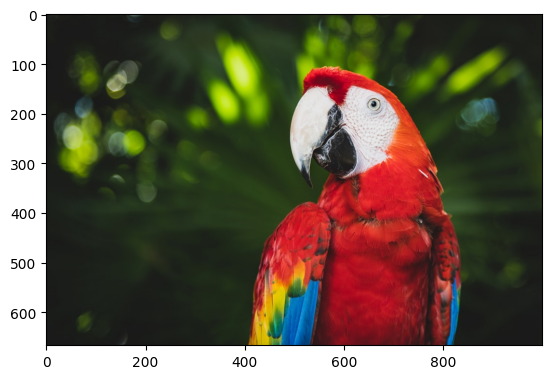

In [6]:
plt.imshow(img) #show image
#Note: changes on the imge is very minimal since we only change a certain pixel in the entire image

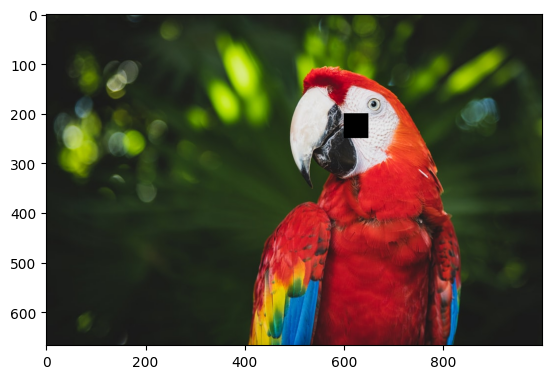

In [7]:
#changing range of pixel value per color
img[200:250, 600:650, 0] = 0 # chnage Red (index 0) value to 0
img[200:250, 600:650, 1] = 0 # chnage Green (index 1) value to 0
img[200:250, 600:650, 2] = 0 # chnage Blue (index 2) value to 0

plt.imshow(img)

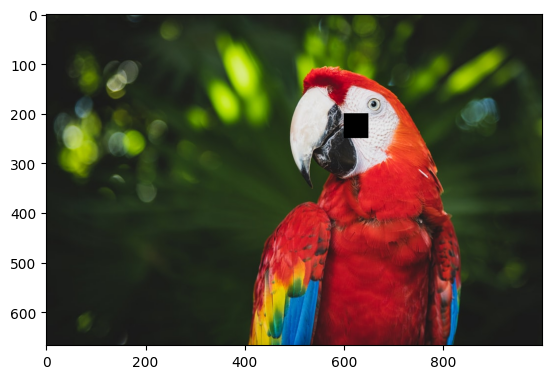

In [8]:
img[200:250, 600:650] = (0,0,0) # or use this code to change RGB values
plt.imshow(img)

Warning

Numpy is an optimized library for fast array calculations. So simply accessing each and every pixel value and modifying it will be very slow and it is discouraged.

Note: The above method is normally used for selecting a region of an array, say the first 5 rows and last 3 columns. For individual pixel access, the Numpy array methods, array.item() and array.itemset() are considered better. They always return a scalar, however, so if you want to access all the B,G,R values, you will need to call array.item() separately for each value.

Preffered Function to Access Pixel value using item()

In [9]:
px = img.item(200,600,0)
print(px)

0


Preffered Function to change Pixel value using itemset()

In [10]:
img.itemset((200,600,0), 188)
px = img.item(200,600,0)
print(px)

188


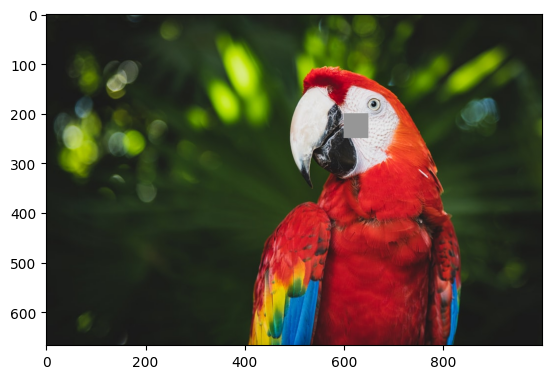

In [11]:
size = 50

for i in range(size):
    for j in range(size):
        img.itemset((200+i, 600+j,0), 150) #Red
        img.itemset((200+i, 600+j,1), 150) #Green
        img.itemset((200+i, 600+j,2), 150) #Blue

plt.imshow(img)

### 1.1.2 Basic Intensity Transformation Functions 

#### A. Image Negatives
The negative of an image with intensity levels in the range [0,𝐿−1] is obtained by using the negative transformation function. This type of processing is used in enhancing white or gray detail embedded in dark regions of an image, especially when the black areas are dominant in size. 

Method 01: Image negative is produced by subtracting each pixel from the maximum intensity value. e.g. for an 8-bit image, the max intensity value is 255, thus each pixel is subtracted from 255 to produce the output image.

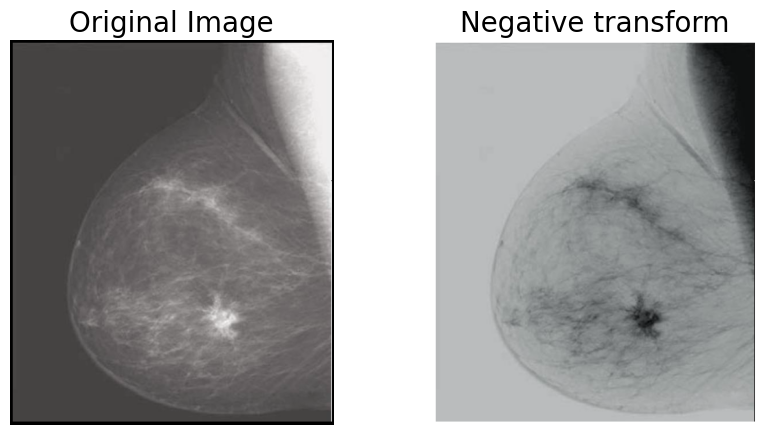

In [12]:
import cv2
import matplotlib.pyplot as plt

#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks


im = cv2.imread('image01.PNG')
im_neg = 255 - im #subtract image from maximum intensity

plt.figure(figsize=(10,5))
plt.subplot(121), plot_image(im, 'Original Image')
plt.subplot(122), plot_image(im_neg, 'Negative transform')
plt.show()

Method 02: OpenCV provides a built-in function cv2.bitwise_not() that inverts every bit of an array. This takes as input the original image and outputs the inverted image. Below is the code for this.

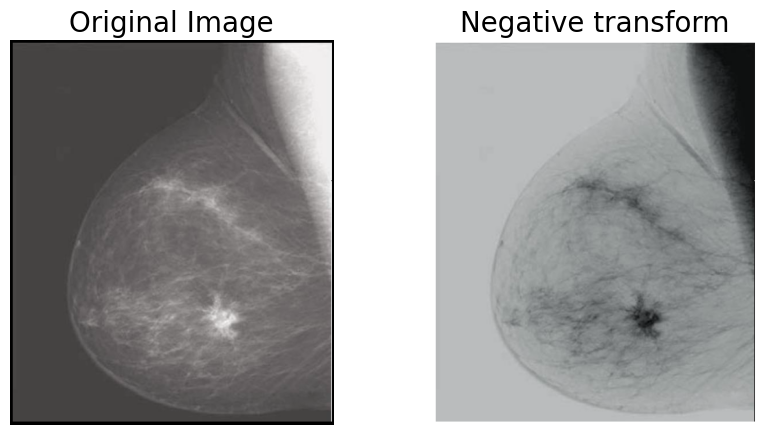

In [13]:
import cv2
import matplotlib.pyplot as plt

#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

# Load the image
img = cv2.imread('image01.png')
 
# Invert the image using cv2.bitwise_not
img_neg = cv2.bitwise_not(img)
 
# Show the image
plt.figure(figsize=(10,5))
plt.subplot(121), plot_image(img, 'Original Image')
plt.subplot(122), plot_image(img_neg, 'Negative transform')
plt.show()

### B. Log transform
Log transformation of an image means replacing all pixel values, present in the image, with its logarithmic values. Log transformation is used for image enhancement as it expands dark pixels of the image as compared to higher pixel values.

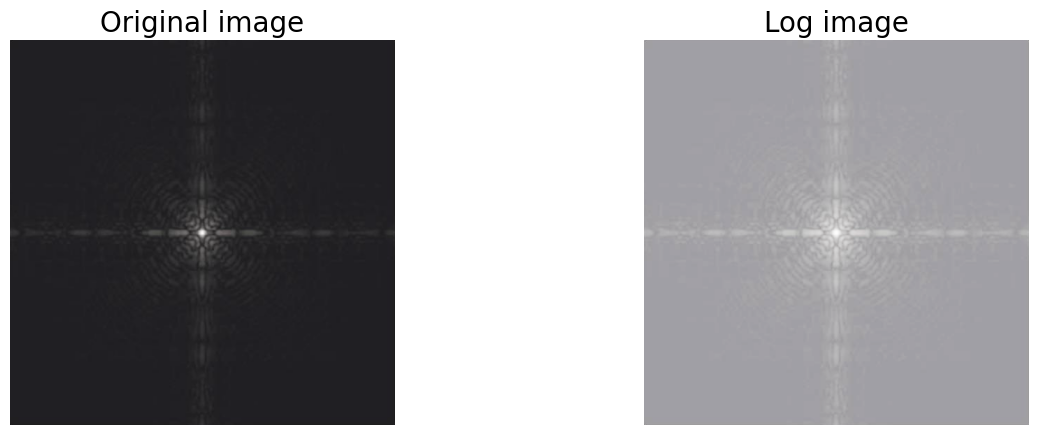

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

    
img = cv2.imread('image02.png')

# c = 255 / (log (1 + max_input_pixel_value)) 
c = 255/(np.log(1 + np.max(img))) 
# s = c log(1 + r).
img_log = c * np.log(1 + img) 

# float value will be converted to int
img_log = np.array(img_log, dtype = np.uint8) 

plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(img, 'Original image')
plt.subplot(122), plot_image(img_log,'Log image')

plt.show()

### C. Power-law transform
Power law or gamma transformation is used to map a narrow range of dark input values into a wider range of output values. Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings.

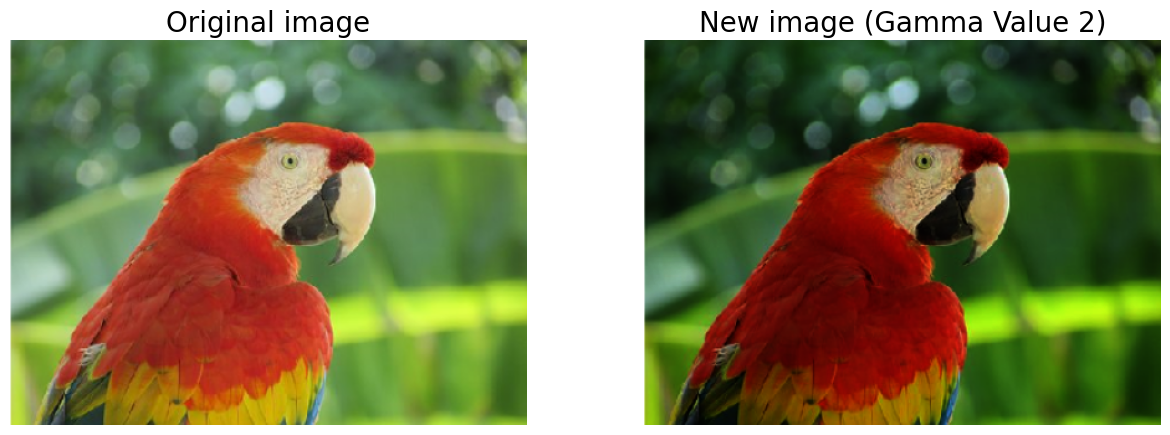

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image)
    plt.axis('off') # comment this line if you want axis ticks

    
img = cv2.imread('image03.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert image to RGB

#Adjust Gamma
gamma = 2

#Apply Gamma
img_gamma = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(img, 'Original image')
plt.subplot(122), plot_image(img_gamma,'New image (Gamma Value {})'.format(gamma))

plt.show()

### D. Contrast Stretching
The contrast stretching operation takes a low-contrast image as input and stretches the narrower range of the intensity values to span a desired wider range of values in order to output a high-contrast output image, thereby enhancing the image's contrast.

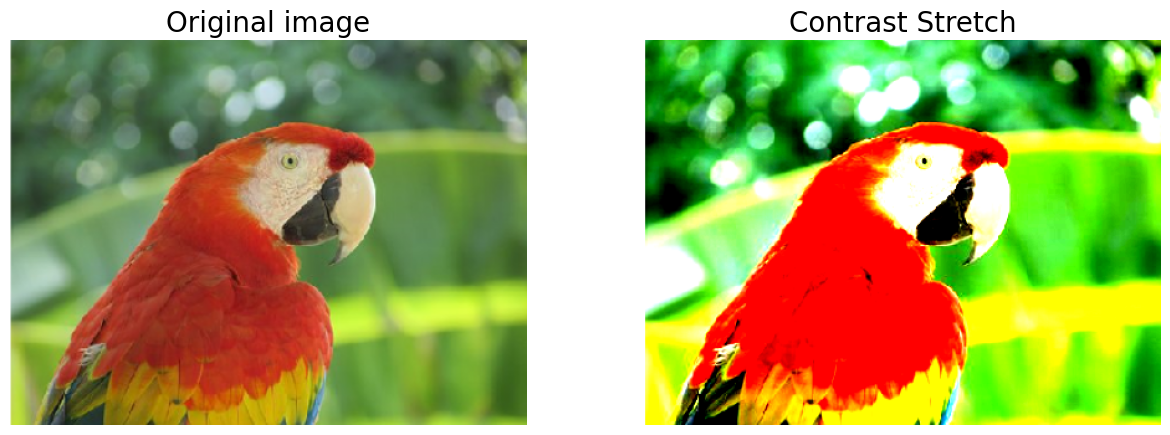

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image / 255) # /255 is added to avoid clipping warining
    plt.axis('off') # comment this line if you want axis ticks

# Function to map each intensity level to output intensity level. Piece-wise linear function
def pixelVal(pix, r1, s1, r2, s2): 
    if (pix >= 0 and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

img = cv2.imread('image03.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert image to RGB

# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

plt.figure(figsize=(15,5))
plt.subplot(121), plot_image(img, 'Original image')
plt.subplot(122), plot_image(contrast_stretched,'Contrast Stretch')
plt.show()


## 1.2 Histogram Processing
Histogram processing techniques provide a better method for altering the dynamic range of pixel values in an image so that its intensity histogram has a desired shape.

### A. Histogram Equalization
Histogram equalization uses a monotonic and a non-linear mapping which reassigns the pixel intensity values in the input image in such a way that the output image has a uniform distribution of intensities (a flat histogram), and thereby enhances the contrast of the image.

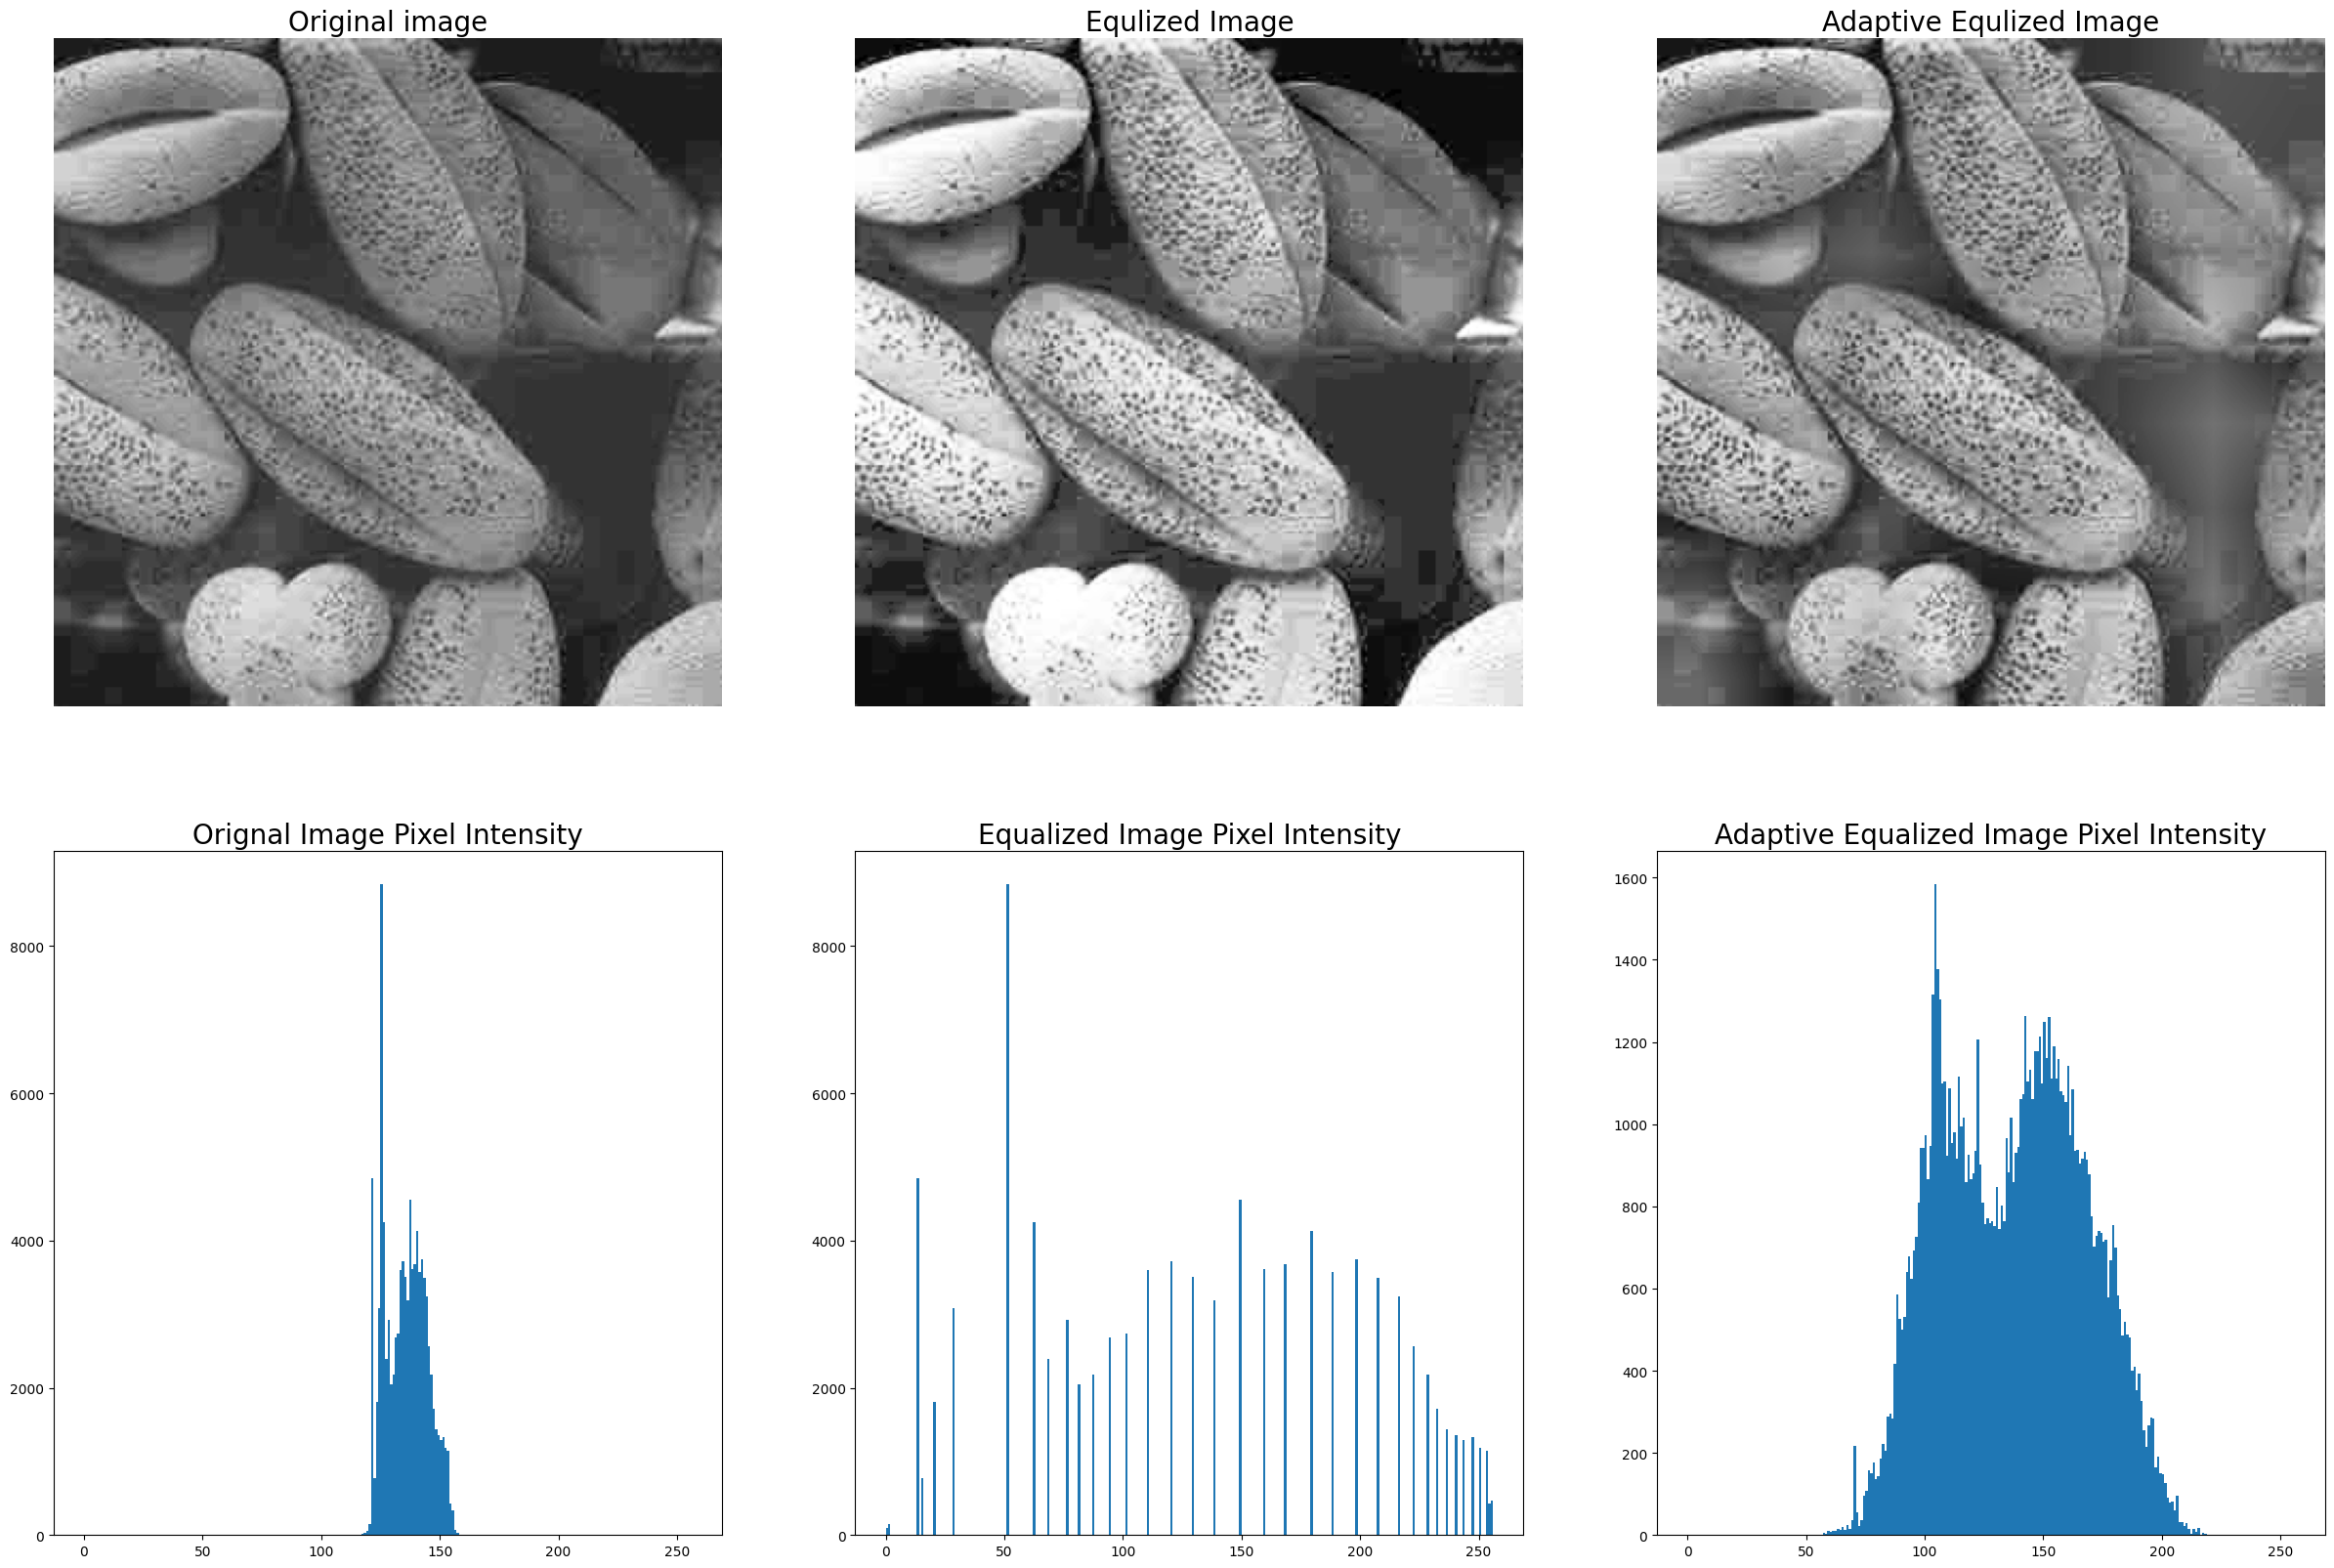

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#function for plotting image
def plot_image(image, title=''):
    plt.title(title, size=20), plt.imshow(image, cmap = 'gray') # cmap = 'gray', render the image in grayscale
    plt.axis('off') # comment this line if you want axis ticks

#function for plotting histrogram
def plot_hist(img, title=''):
    plt.title(title, size=20), plt.hist(img.ravel(),256,[0,256]) 

img = cv2.imread('image05.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert image to RGB

# creating a Histograms Equalization
# of a image using cv2.equalizeHist()
equ = cv2.equalizeHist(img)

# The declaration of Adaptive Histrogram Equalization
# clipLimit -> Threshold for contrast limiting
# CLAHE is a variant of Adaptive histogram equalization (AHE) which takes care of over-amplification of the contrast. 
clahe = cv2.createCLAHE(clipLimit = 5) 
final_img = clahe.apply(img)


plt.figure(figsize=(30,20))
plt.subplot(231), plot_image(img, 'Original image')
plt.subplot(232), plot_image(equ, 'Equlized Image')
plt.subplot(233), plot_image(final_img, 'Adaptive Equlized Image')
plt.subplot(234), plot_hist(img, 'Orignal Image Pixel Intensity')
plt.subplot(235), plot_hist(equ, 'Equalized Image Pixel Intensity')
plt.subplot(236), plot_hist(final_img, 'Adaptive Equalized Image Pixel Intensity')
plt.show()

# Part 2: Lab Task 

## Task 01
Write a program that will generate the image below.
Note: Use task02.jpg image for this activity and resize it to 1400x500.

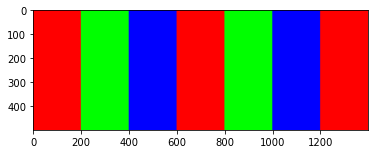

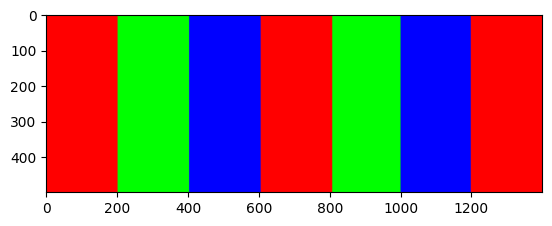

In [18]:
#write your code here
import cv2
import numpy as np
import matplotlib.pyplot as plt

img =cv2.imread("task02.png")
img[:, :220] = (255,0,0)#red
plt.imshow(img)
img[:, 220:440] = (0,255,0)#green
plt.imshow(img)
img[:, 440:660] = (0,0,255)#blue
plt.imshow(img)
img[:, 660:880] = (255,0,0)#red
plt.imshow(img)
img[:, 880:1090] = (0,255,0)#green
plt.imshow(img)
img[:, 1090:1306] = (0,0,255)
plt.imshow(img)
img[:, 1306:] = (255,0,0)
plt.imshow(img)

dim=(1400,500)
resized=cv2.resize(img,dim)
plt.subplot(111)

plt.imshow(resized)
plt.show()

## Task 02
Given the original image below.
Note: Use task01.jpg image for this activity

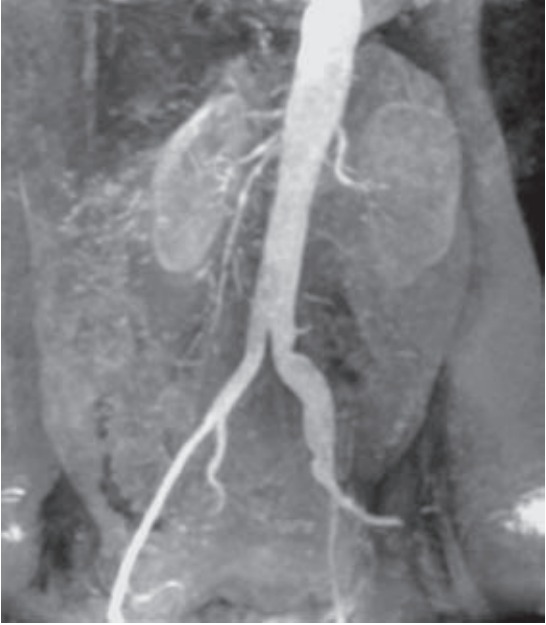

Write the code that will highlight the root part from the image.

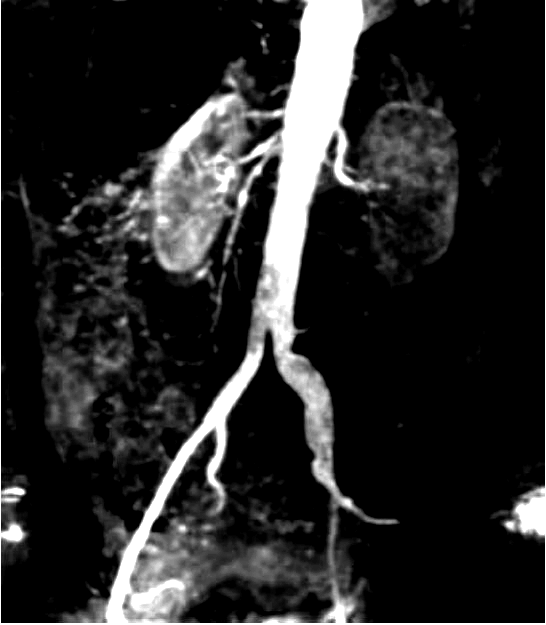

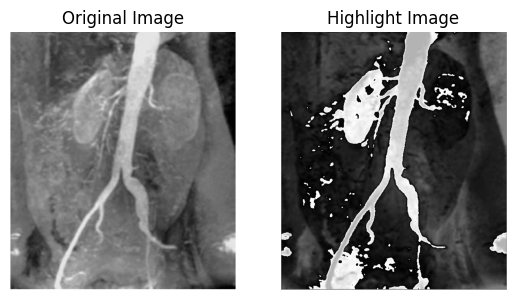

In [19]:
#Write your Code here
#task2 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, title = " "):
    plt.title(title)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

img =cv2.imread("task01.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
high_img= 155 - img

plt.subplot(121)
plot_image(img,"Original Image")

plt.subplot(122)
plot_image(high_img,"Highlight Image")

plt.show()